<a href="https://colab.research.google.com/github/JF11579/Adelphi/blob/main/Stacked_Complaints_4_20_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Road Map

### Our goal is categorize the Consumer Narative so that when new Narative is introduced it correctly predicts which category it belongs in.

### Our data starts with 2.5 million rows and half a dozen or so cols.  First we subset out  ISSUE and Consumer Narative.  Next we look into the NANs.  ISSUE has zero but   NARATIVE  has 1.6 million.  Ouch. We remove the NANs and this drops us down to about 900k rows.

### More problematic though is the VERY skewed distribution of the data .  Some Issues have almost 200k  observations while other have only a handful.  We could drop the least common Issues but first we are going to try and make it work. If that was me on the phone with an  uncommon Issue I would want help.  Considering the unusual nature of their Issue the caller might need more, not less, of our help. We removed the 4 most common Issues and then got the Quantiles of the remainder.  The avg of that remainder is appx 5,000.  The avg of the bottom quartile is appx 47.  Devidng 5000 / 47 = 115 or so.  Python's SAMPLE tool not only lets one extract fractions of data but if instead of  a number less than 1,  one enters a integer >1 one, it  increases the size of  the data set.  It actually just duplicates existing rows, for better or worse.  We multiplied the bottom quartile by 115 and then concatenated that onthe original datsset.

### To increase the data we first grouped-by the original data and got totals for each ISSUE.  This gave us a 2 column DF: Issue and Count.  Next we subsetted out the ISSUE column from the bottom quartile using "isin" .  (The Py version of Merge is not as user friendly as the R version, just like the re-nameing of cols.) and in this way we were able to extract from the original Df the bottom quartile.  It was this that we multiplied.

### Every place but in our class one is told to pre-process the data then split it.  We want to do the reverse.  So we pre-process seperately X-train and y_train.

### I utterly did not use my time wisely.  I spent dozens of hours on this and it still is not done.  e.g. Despite hitting Save very frequently , at one of the points when Jupyter froze and I had to restart the computer there was a serius amount of white space where code was once written.

###  In the first week of the project I had made a sample of the  data to expedite the coding.  For no good reason I had forgotten to continue that .I thinkI got focused more on making the data BIGGER.  That would have been a very big help here.

# Libraries


In [ ]:
!pip install --upgrade ipykernel

In [ ]:
import pandas as pd
import nltk

In [ ]:
import seaborn as sns

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import numpy as np
import re

[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1129)>
[nltk_data] Error loading wordnet: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1129)>


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
!pip install pandarallel

In [ ]:
import nltk
from pandarallel import pandarallel

pandarallel.initialize(progress_bar=True)

INFO: Pandarallel will run on 4 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


In [ ]:
from nltk.corpus import stopwords
stop = stopwords.words('english')



# Data

In [ ]:
df = pd.read_csv('complaints.csv',encoding = 'utf-8')

/var/folders/_k/0b37qbmx5gz084p4png5n4840000gr/T/ipykernel_770/1945214178.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('complaints.csv',encoding = 'utf-8')


In [ ]:
complaints = df

In [ ]:
complaints_select = complaints[['Issue' , 'Consumer complaint narrative']]

In [ ]:
complaints_select.head()

,Issue,Consumer complaint narrative
0,Struggling to repay your loan,NaN
1,Problem with a credit reporting company's inve...,"As by Law, under 15 U.S Code 1601- Congression..."
2,Trouble during payment process,I am the personal representative of my sister ...
3,Incorrect information on your report,"XXXX, XXXX XXXX SOC SEC # XXXX DOB XX/XX/XXXX ..."
4,Problem with a credit reporting company's inve...,NaN


In [ ]:
complaints_select.dtypes

Issue                           object
Consumer complaint narrative    object
dtype: object

In [ ]:
complaints_select['Issue'] = complaints_select['Issue'].astype('string')
complaints_select['Consumer complaint narrative'] = complaints_select['Consumer complaint narrative'].astype('string')

/var/folders/_k/0b37qbmx5gz084p4png5n4840000gr/T/ipykernel_770/3989488772.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  complaints_select['Issue'] = complaints_select['Issue'].astype('string')
/var/folders/_k/0b37qbmx5gz084p4png5n4840000gr/T/ipykernel_770/3989488772.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  complaints_select['Consumer complaint narrative'] = complaints_select['Consumer complaint narrative'].astype('string')


In [ ]:
complaints_select.dtypes

Issue                           string
Consumer complaint narrative    string
dtype: object

In [ ]:
complaints_select.shape #2.5 million rows

(2561599, 2)

# How many NANs?

In [ ]:
complaints_select.isnull().sum(axis=0)

Issue                                 0
Consumer complaint narrative    1663827
dtype: int64

In [ ]:
complaints_select = complaints_select.dropna()
complaints_select = complaints_select.reset_index(drop=True)

In [ ]:
complaints_select.shape #2.5 million rows

(897772, 2)

In [ ]:
complaints_select["Issue"].nunique()

160

# complaints_select_2

In [ ]:
complaints_select_2 = complaints_select

In [ ]:
complaints_select_2.shape

(897772, 2)

# How many of each?

In [ ]:
complaints_select_sort = complaints_select_2["Issue"].value_counts()

In [ ]:
complaints_select_sort = complaints_select_sort.to_frame().reset_index()

In [ ]:
complaints_select_sort.shape

(160, 2)

In [ ]:
complaints_select_sort.head(3)

,index,Issue
0,Incorrect information on your report,197459
1,Problem with a credit reporting company's inve...,118115
2,Attempts to collect debt not owed,62114


In [ ]:
#complaints_select_sort.tail(50)

In [ ]:
#complaints_select_sorted = complaints_select_2.groupby(['Issue'])['Issue'].count()

In [ ]:
#complaints_select_sorted = pd.DataFrame(complaints_select_sorted)
#complaints_select_sorted

In [ ]:
#final_df = df.sort_values(by=['2'], ascending=False)

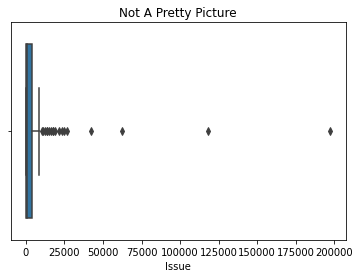

In [ ]:
ax = sns.boxplot(x= complaints_select_sort["Issue"]).set_title('Not A Pretty Picture')

<AxesSubplot:xlabel='Issue', ylabel='index'>

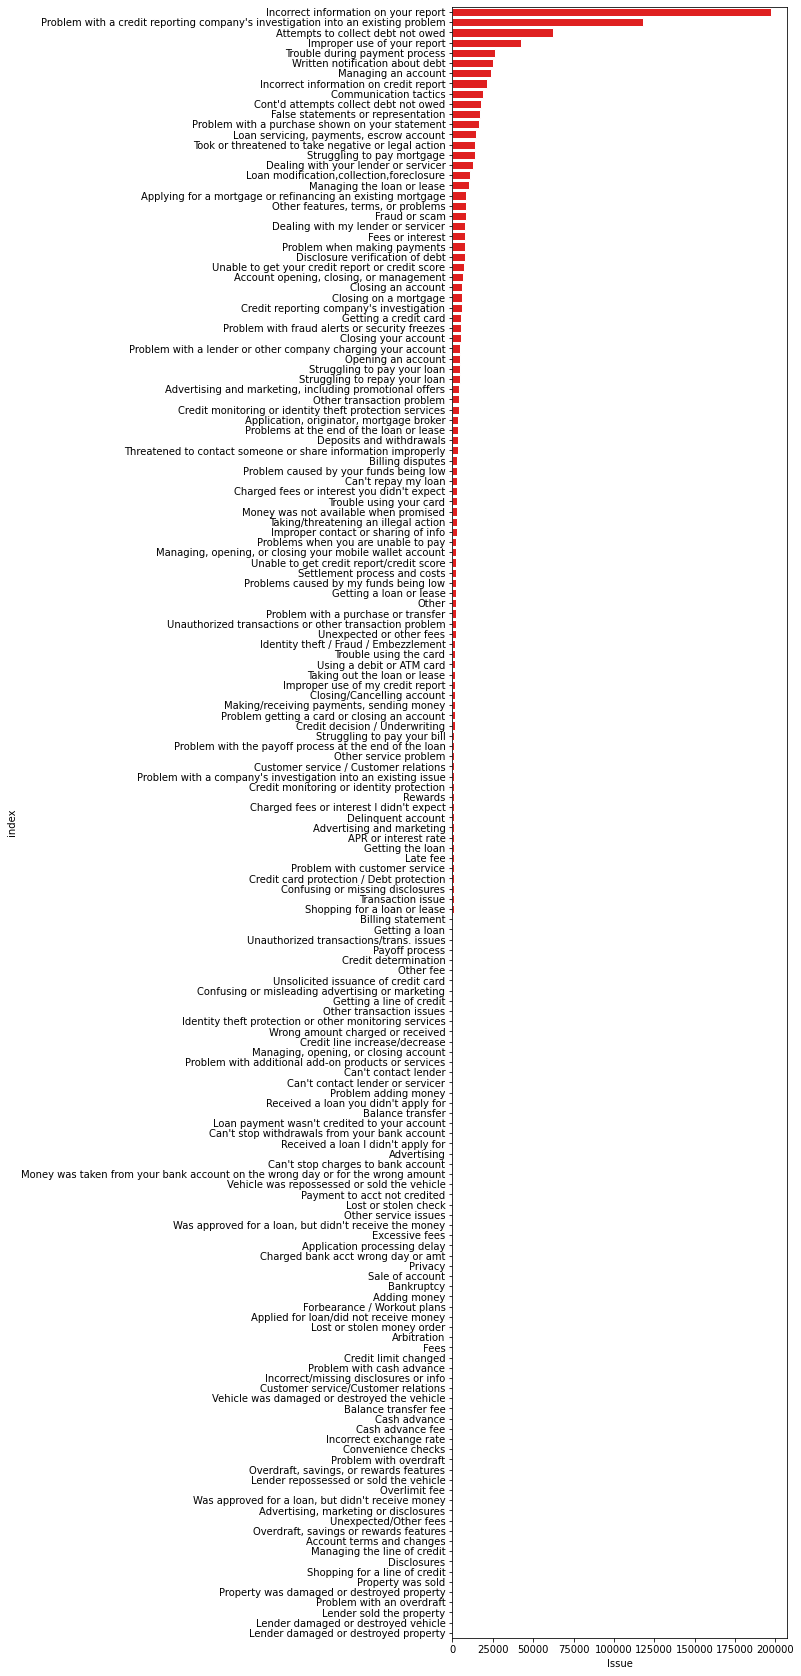

In [ ]:
f, ax = plt.subplots(figsize = (6,30))
sns.set_color_codes('pastel')
sns.barplot(x = 'Issue', y = 'index', data = complaints_select_sort,
            label = 'Total', color = 'red', edgecolor = 'w')

# Let us look at the distribution

In [ ]:
complaints_select_sort.Issue.quantile([0.25,0.5,0.75])

0.25     134.25
0.50     832.00
0.75    3774.00
Name: Issue, dtype: float64

# 50 % of the items lie btwn 134 and 3774.

In [ ]:
complaints_select_sort['Issue'].quantile(0.9)

10973.79999999999

In [ ]:
complaints_select_sort['Issue'].quantile(0.99)

85074.40999999981

In [ ]:
complaints_select_sort['Issue'].quantile(0.999)

184843.30400000064

In [ ]:
complaints_select_sort['Issue'].quantile(0.9999)

196197.4303999987

In [ ]:
complaints_select_sort['Issue'].quantile(0.99999) 
# this is our top value

197332.84304000056

In [ ]:
complaints_select_SANS_4.shape

(160,)

### The top 4 are especially bigger than the rest.

### We will drop them for a moment and get the mean of the rest

In [ ]:
complaints_select_sort.shape

(160, 2)

In [ ]:
complaints_select_SANS_4 = complaints_select_sort.iloc[4:]

In [ ]:
complaints_select_SANS_4.shape

(156, 2)

In [ ]:
complaints_select_SANS_4

,index,Issue
4,Trouble during payment process,26545
5,Written notification about debt,24943
6,Managing an account,23592
7,Incorrect information on credit report,21217
8,Communication tactics,18810
...,...,...
155,Property was damaged or destroyed property,5
156,Problem with an overdraft,3
157,Lender sold the property,3
158,Lender damaged or destroyed vehicle,2


In [ ]:
# df.columns = ['Leader', 'Time', 'Score']

complaints_select_SANS_4.columns = ['Issue', 'Count']

In [ ]:
complaints_select_SANS_4

,Issue,Count
4,Trouble during payment process,26545
5,Written notification about debt,24943
6,Managing an account,23592
7,Incorrect information on credit report,21217
8,Communication tactics,18810
...,...,...
155,Property was damaged or destroyed property,5
156,Problem with an overdraft,3
157,Lender sold the property,3
158,Lender damaged or destroyed vehicle,2


In [ ]:
complaints_select_SANS_4.shape

(156, 2)

In [ ]:
#complaints_select_SANS_4 = pd.DataFrame(complaints_select_SANS_4)

In [ ]:
#complaints_select_SANS_4 = complaints_select_SANS_4.groupby(['Issue'])['Issue'].count()

In [ ]:
#complaints_select_SANS_4_sorted = pd.DataFrame(complaints_select_SANS_4_sorted)

In [ ]:
#complaints_select_SANS_4_sorted.drop(['level_0','index'], axis =1)

In [ ]:
#complaints_select_SANS_4_sorted.reset_index(inplace=True)

In [ ]:
#complaints_select_SANS_4_sorted = complaints_select_SANS_4_sorted.sort_values(by=['Count'], ascending=False)

In [ ]:
complaints_select_SANS_4_sorted

,level_0,index,Issue,Issue
0,0,72,Incorrect information on your report,197458
1,1,111,Problem with a credit reporting company's inve...,118113
2,2,13,Attempts to collect debt not owed,62114
3,3,69,Improper use of your report,42278
4,4,143,Trouble during payment process,26544
...,...,...,...,...
155,155,125,Property was damaged or destroyed property,5
156,156,116,Problem with an overdraft,3
157,157,78,Lender sold the property,3
158,158,76,Lender damaged or destroyed vehicle,2


### After removing the top 4 items the avg of the top 75% of the data is 832

In [ ]:
avg = complaints_select_SANS_4['Count'].mean()# 5611.05
avg

3062.858974358974

In [ ]:
top_three_quarters_avg = complaints_select_sort[complaints_select_sort['Issue'].between(134 , 197459)]

In [ ]:
top_three_quarters_avg =  top_three_quarters_avg["Issue"].mean()
top_three_quarters_avg # = 7465

7465.133333333333

### The avg of the DF withouth the top 4 is 7,465.  Next we get the avg of the bottom quartile.

In [ ]:
bottom_quartile = complaints_select_sort[complaints_select_sort['Issue'].between(1 , 134)]

In [ ]:
bottom_quartile.head(3)

,index,Issue
120,Excessive fees,123
121,Application processing delay,107
122,Charged bank acct wrong day or amt,106


In [ ]:
bottom_quartile_avg = bottom_quartile["Issue"].mean() # = 49
bottom_quartile_avg

48.9

### After removing the top 4 the avg of the top 75% is 7,465 while the bottom quarter avg is 49.  Using *Sample Replace*  and instead of using a fraction use a integer we can increase the too small part of the data.

https://www.geeksforgeeks.org/how-to-randomly-select-rows-from-pandas-dataframe/

In [ ]:
top_three_fourths_avg = 7465
bottom_quarter_avg = 49
top_three_fourths_avg/bottom_quarter_avg # 152

152.3469387755102

### We will multiply the bottom quarter by 152 to bring it more in line with the rest of the data

In [ ]:
#df1.sample(n = 6, replace = True)
bottom_quartile_enlarged = bottom_quartile


In [ ]:
bottom_quartile_enlarged.head(3)

,Issue,Count
120,Excessive fees,123
121,Application processing delay,107
122,Charged bank acct wrong day or amt,106


In [ ]:
bottom_quartile_enlarged = bottom_quartile_enlarged.sample(frac = 152, replace = True)

In [ ]:
bottom_quartile_enlarged.shape

(6080, 2)

In [ ]:
#bottom_quartile_enlarged= bottom_quartile_enlarged.drop('level_0',1)

In [ ]:
bottom_quartile_enlarged.head(3)

,Issue,Count
126,Adding money,92
136,Vehicle was damaged or destroyed the vehicle,51
140,Incorrect exchange rate,38


In [ ]:
#bottom_quartile_enlarged.reset_index(inplace=True)

In [ ]:
#Rename
#bottom_quartile_enlarged.columns = ['Issue',"Count"]

In [ ]:
#bottom_quartile_enlarged.shape

(40, 2)

In [ ]:
#complaints_select_sorted
#complaints_select_sort.head(3)

,index,Issue
0,Incorrect information on your report,197459
1,Problem with a credit reporting company's inve...,118115
2,Attempts to collect debt not owed,62114


In [ ]:
#df.columns = ['Leader', 'Time', 'Score']
#complaints_select_sort.columns = ['Issue',"Count"]

In [ ]:
#complaints_select_sort.head(3)

,Issue,Count
0,Incorrect information on your report,197459
1,Problem with a credit reporting company's inve...,118115
2,Attempts to collect debt not owed,62114


In [ ]:
complaints_select_sorted.shape

(160,)

# Stack the two data fames

https://www.datasciencemadesimple.com/append-concatenate-rows-python-pandas-row-bind/

In [ ]:
#complaints_select_sorted.reset_index(inplace=True)

In [ ]:
#less_unbalanced  = pd.concat([complaints_select_sorted, bottom_quartile_enlarged])

In [ ]:
#less_unbalanced.shape

(200, 2)

In [ ]:
#complaints_select_sorted.shape

In [ ]:
###############


In [ ]:
complaints_select.head(5)

,Issue,Consumer complaint narrative
0,Problem with a credit reporting company's inve...,"As by Law, under 15 U.S Code 1601- Congression..."
1,Trouble during payment process,I am the personal representative of my sister ...
2,Incorrect information on your report,"XXXX, XXXX XXXX SOC SEC # XXXX DOB XX/XX/XXXX ..."
3,Problem with a credit reporting company's inve...,First Progress Card was notified throughout th...
4,Attempts to collect debt not owed,I got an email from my credit card company abo...


In [ ]:
complaints_select_3 = complaints_select_2

In [ ]:
complaints_select_3.shape

(897772, 2)

In [ ]:
bottom_quartile.head(3)

,Issue,Count
120,Excessive fees,123
121,Application processing delay,107
122,Charged bank acct wrong day or amt,106


In [ ]:
Bottom_single = bottom_quartile['Issue']

In [ ]:
#Bottom_single

In [ ]:
#pd.DataFrame(complaints_select_SANS_4_sorted)
Bottom_single.to_frame()

,Issue
120,Excessive fees
121,Application processing delay
122,Charged bank acct wrong day or amt
123,Privacy
124,Sale of account
125,Bankruptcy
126,Adding money
127,Forbearance / Workout plans
128,Applied for loan/did not receive money
129,Lost or stolen money order


In [ ]:
Bottom_single =Bottom_single.to_frame()

In [ ]:
Bottom_single

,Issue
120,Excessive fees
121,Application processing delay
122,Charged bank acct wrong day or amt
123,Privacy
124,Sale of account
125,Bankruptcy
126,Adding money
127,Forbearance / Workout plans
128,Applied for loan/did not receive money
129,Lost or stolen money order


In [ ]:
Bottom_single.reset_index(inplace=True)

In [ ]:
Bottom_single

,index,Issue
0,120,Excessive fees
1,121,Application processing delay
2,122,Charged bank acct wrong day or amt
3,123,Privacy
4,124,Sale of account
5,125,Bankruptcy
6,126,Adding money
7,127,Forbearance / Workout plans
8,128,Applied for loan/did not receive money
9,129,Lost or stolen money order


In [ ]:
#Bottom_single.columns = ['index','Issue']

In [ ]:
Bottom_single.shape

(40, 2)

In [ ]:
complaints_select_3 = complaints_select_2

In [ ]:
complaints_select_3.shape

(897772, 2)

In [ ]:
#Bottom_single.reset_index(inplace=True) #complaints_select_3

In [ ]:
m = complaints_select_3.Issue.isin(Bottom_single.Issue)

In [ ]:
complaints_select_3 = complaints_select_3[m]

In [ ]:
complaints_select_3.shape

(1956, 2)

In [ ]:
complaints_select_3.head()

,Issue,Consumer complaint narrative
372,"Was approved for a loan, but didn't receive money",This is actually me having to re-open this com...
5587,Incorrect exchange rate,XX/XX/19 I brought a cashier 's check from a r...
5668,Excessive fees,"A couple of years back I had some misfortunes,..."
6261,Vehicle was damaged or destroyed the vehicle,"XXXX XXXX XXXX delivered on XX/XX/XXXX, HOWEVE..."
6440,Problem with overdraft,I have been a devoted customer of NetSpend Cor...


In [ ]:
#bottom_quartile_enlarged.sample( n = 115, replace = True)
#complaints_select_3.sample(n = 10, replace = True)
df2 = complaints_select_3.sample(n=len(complaints_select_3)*115, replace = True)

In [ ]:
df2.shape

(224940, 2)

In [ ]:
#complaints_select_3.shape

In [ ]:
df2.head()

,Issue,Consumer complaint narrative
888655,Excessive fees,Money Management international did not disclos...
539505,Problem with cash advance,I recently applied for cash advances/personal ...
250648,Forbearance / Workout plans,While working on a loan modification with XXXX...
654666,Charged bank acct wrong day or amt,I set up payment to come directly from my payr...
402733,Problem with an overdraft,I have a Chase Bank Account and XXXX Account w...


In [ ]:
complaints_select_2.head(3)

### now concatenate the original with df2 to make it less unbalanced

In [ ]:
Augemted = pd.concat([complaints_select_2 , df2])

In [ ]:
Augemted.shape

(1122712, 2)

In [ ]:
Augemted_2 = Augemted

In [ ]:
Augemted_2.head()

,Issue,Consumer complaint narrative
0,Problem with a credit reporting company's inve...,"As by Law, under 15 U.S Code 1601- Congression..."
1,Trouble during payment process,I am the personal representative of my sister ...
2,Incorrect information on your report,"XXXX, XXXX XXXX SOC SEC # XXXX DOB XX/XX/XXXX ..."
3,Problem with a credit reporting company's inve...,First Progress Card was notified throughout th...
4,Attempts to collect debt not owed,I got an email from my credit card company abo...


## the original dataset was 2.5 million but when we dropped the NANs the data went down to just under 900k rows.  We multilpied the bottom quartile to make it less unbalanced, Now the data  is 1.2 million rows.

# Part 2

## Split the data

### Splitting the data is easy enough but becasue we need to keep the Y_train data in line withthe X_train data we have to do all pre-processing in the dFD

In [ ]:
#Bottom_single.columns = ['index','Issue']
A =Augemted.rename(columns = {'Issue':'Issue','Consumer complaint narrative' : 'Consumer_complaint_narrative'})

In [ ]:
A.head(3)

,Issue,Consumer_complaint_narrative
0,Problem with a credit reporting company's inve...,"As by Law, under 15 U.S Code 1601- Congression..."
1,Trouble during payment process,I am the personal representative of my sister ...
2,Incorrect information on your report,"XXXX, XXXX XXXX SOC SEC # XXXX DOB XX/XX/XXXX ..."


In [ ]:
A1 = A

In [ ]:
A1.head(3)

,Issue,Consumer_complaint_narrative
0,Problem with a credit reporting company's inve...,"As by Law, under 15 U.S Code 1601- Congression..."
1,Trouble during payment process,I am the personal representative of my sister ...
2,Incorrect information on your report,"XXXX, XXXX XXXX SOC SEC # XXXX DOB XX/XX/XXXX ..."


### Lower case

In [ ]:
A1['Issue'] =A1['Issue'].str.lower()

In [ ]:
A1['Consumer_complaint_narrative'] = A1['Consumer_complaint_narrative'].str.lower()

In [ ]:
A1

,Issue,Consumer_complaint_narrative
0,problem with a credit reporting company's inve...,"as by law, under 15 u.s code 1601- congression..."
1,trouble during payment process,i am the personal representative of my sister ...
2,incorrect information on your report,"xxxx, xxxx xxxx soc sec # xxxx dob xx/xx/xxxx ..."
3,problem with a credit reporting company's inve...,first progress card was notified throughout th...
4,attempts to collect debt not owed,i got an email from my credit card company abo...
...,...,...
327197,fees,"well, i called citi on xxxx/xxxx/16 to determi..."
384795,fees,american express gift cards charged {$60.00} i...
652980,applied for loan/did not receive money,i applied for a loan worth up to xxxx dollars ...
714530,charged bank acct wrong day or amt,big picture loans. fraudulent practices. recei...


## Remove punctuation

In [ ]:
A1['Issue'] =A1['Issue'].str.replace(r'[^\w\s]+', '')

/var/folders/_k/0b37qbmx5gz084p4png5n4840000gr/T/ipykernel_770/2608351658.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  A1['Issue'] =A1['Issue'].str.replace(r'[^\w\s]+', '')


In [ ]:
A1['Consumer_complaint_narrative'] =A1['Consumer_complaint_narrative'].str.replace(r'[^\w\s]+', '')

/var/folders/_k/0b37qbmx5gz084p4png5n4840000gr/T/ipykernel_770/848086846.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  A1['Consumer_complaint_narrative'] =A1['Consumer_complaint_narrative'].str.replace(r'[^\w\s]+', '')


In [ ]:
A1

,Issue,Consumer_complaint_narrative
0,problem with a credit reporting companys inves...,as by law under 15 us code 1601 congressional ...
1,trouble during payment process,i am the personal representative of my sister ...
2,incorrect information on your report,xxxx xxxx xxxx soc sec xxxx dob xxxxxxxx addr...
3,problem with a credit reporting companys inves...,first progress card was notified throughout th...
4,attempts to collect debt not owed,i got an email from my credit card company abo...
...,...,...
327197,fees,well i called citi on xxxxxxxx16 to determine ...
384795,fees,american express gift cards charged 6000 in in...
652980,applied for loandid not receive money,i applied for a loan worth up to xxxx dollars ...
714530,charged bank acct wrong day or amt,big picture loans fraudulent practices receive...


## tokenize

In [ ]:
A2 = A1

NameError: name 'A1' is not defined

In [ ]:
import nltk
from pandarallel import pandarallel

pandarallel.initialize(progress_bar=True)

INFO: Pandarallel will run on 4 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


In [ ]:
#df['new_col'] = df['text'].parallel_apply(lambda x: nltk.word_tokenize(x))
A2['issue_stopped'] =A2['Issue_token'] = A2['Issue'].parallel_apply(lambda x: nltk.word_tokenize(x))

NameError: name 'A2' is not defined

In [ ]:
A2

,Issue,Consumer_complaint_narrative,Issue_token
0,problem with a credit reporting companys inves...,as by law under 15 us code 1601 congressional ...,"[problem, with, a, credit, reporting, companys..."
1,trouble during payment process,i am the personal representative of my sister ...,"[trouble, during, payment, process]"
2,incorrect information on your report,xxxx xxxx xxxx soc sec xxxx dob xxxxxxxx addr...,"[incorrect, information, on, your, report]"
3,problem with a credit reporting companys inves...,first progress card was notified throughout th...,"[problem, with, a, credit, reporting, companys..."
4,attempts to collect debt not owed,i got an email from my credit card company abo...,"[attempts, to, collect, debt, not, owed]"
...,...,...,...
327197,fees,well i called citi on xxxxxxxx16 to determine ...,[fees]
384795,fees,american express gift cards charged 6000 in in...,[fees]
652980,applied for loandid not receive money,i applied for a loan worth up to xxxx dollars ...,"[applied, for, loandid, not, receive, money]"
714530,charged bank acct wrong day or amt,big picture loans fraudulent practices receive...,"[charged, bank, acct, wrong, day, or, amt]"


In [ ]:
#df['new_col'] = df['text'].parallel_apply(lambda x: nltk.word_tokenize(x))
A2['Consumer_complaint_narrative_token'] = A2['Consumer_complaint_narrative'].parallel_apply(lambda x: nltk.word_tokenize(x))

In [ ]:
 A2 #10amm:10:10

,Issue,Consumer_complaint_narrative,Issue_token,Consumer_complaint_narrative_token
0,problem with a credit reporting companys inves...,as by law under 15 us code 1601 congressional ...,"[problem, with, a, credit, reporting, companys...","[as, by, law, under, 15, us, code, 1601, congr..."
1,trouble during payment process,i am the personal representative of my sister ...,"[trouble, during, payment, process]","[i, am, the, personal, representative, of, my,..."
2,incorrect information on your report,xxxx xxxx xxxx soc sec xxxx dob xxxxxxxx addr...,"[incorrect, information, on, your, report]","[xxxx, xxxx, xxxx, soc, sec, xxxx, dob, xxxxxx..."
3,problem with a credit reporting companys inves...,first progress card was notified throughout th...,"[problem, with, a, credit, reporting, companys...","[first, progress, card, was, notified, through..."
4,attempts to collect debt not owed,i got an email from my credit card company abo...,"[attempts, to, collect, debt, not, owed]","[i, got, an, email, from, my, credit, card, co..."
...,...,...,...,...
327197,fees,well i called citi on xxxxxxxx16 to determine ...,[fees],"[well, i, called, citi, on, xxxxxxxx16, to, de..."
384795,fees,american express gift cards charged 6000 in in...,[fees],"[american, express, gift, cards, charged, 6000..."
652980,applied for loandid not receive money,i applied for a loan worth up to xxxx dollars ...,"[applied, for, loandid, not, receive, money]","[i, applied, for, a, loan, worth, up, to, xxxx..."
714530,charged bank acct wrong day or amt,big picture loans fraudulent practices receive...,"[charged, bank, acct, wrong, day, or, amt]","[big, picture, loans, fraudulent, practices, r..."


In [ ]:
#df.to_csv(index=False)
A2.to_csv('Tokenized_Data.csv' ,index=False)

In [ ]:
test = pd.read_csv('Tokenized_Data.csv',encoding = 'utf-8')

In [ ]:
test.head()

,Issue,Consumer_complaint_narrative,Issue_token,Consumer_complaint_narrative_token
0,problem with a credit reporting companys inves...,as by law under 15 us code 1601 congressional ...,"['problem', 'with', 'a', 'credit', 'reporting'...","['as', 'by', 'law', 'under', '15', 'us', 'code..."
1,trouble during payment process,i am the personal representative of my sister ...,"['trouble', 'during', 'payment', 'process']","['i', 'am', 'the', 'personal', 'representative..."
2,incorrect information on your report,xxxx xxxx xxxx soc sec xxxx dob xxxxxxxx addr...,"['incorrect', 'information', 'on', 'your', 're...","['xxxx', 'xxxx', 'xxxx', 'soc', 'sec', 'xxxx',..."
3,problem with a credit reporting companys inves...,first progress card was notified throughout th...,"['problem', 'with', 'a', 'credit', 'reporting'...","['first', 'progress', 'card', 'was', 'notified..."
4,attempts to collect debt not owed,i got an email from my credit card company abo...,"['attempts', 'to', 'collect', 'debt', 'not', '...","['i', 'got', 'an', 'email', 'from', 'my', 'cre..."


In [ ]:
test.shape

(1122712, 4)

In [ ]:
A3 = test

In [ ]:
A3

,Issue,Consumer_complaint_narrative,Issue_token,Consumer_complaint_narrative_token
0,problem with a credit reporting companys inves...,as by law under 15 us code 1601 congressional ...,"['problem', 'with', 'a', 'credit', 'reporting'...","['as', 'by', 'law', 'under', '15', 'us', 'code..."
1,trouble during payment process,i am the personal representative of my sister ...,"['trouble', 'during', 'payment', 'process']","['i', 'am', 'the', 'personal', 'representative..."
2,incorrect information on your report,xxxx xxxx xxxx soc sec xxxx dob xxxxxxxx addr...,"['incorrect', 'information', 'on', 'your', 're...","['xxxx', 'xxxx', 'xxxx', 'soc', 'sec', 'xxxx',..."
3,problem with a credit reporting companys inves...,first progress card was notified throughout th...,"['problem', 'with', 'a', 'credit', 'reporting'...","['first', 'progress', 'card', 'was', 'notified..."
4,attempts to collect debt not owed,i got an email from my credit card company abo...,"['attempts', 'to', 'collect', 'debt', 'not', '...","['i', 'got', 'an', 'email', 'from', 'my', 'cre..."
...,...,...,...,...
1122707,fees,well i called citi on xxxxxxxx16 to determine ...,['fees'],"['well', 'i', 'called', 'citi', 'on', 'xxxxxxx..."
1122708,fees,american express gift cards charged 6000 in in...,['fees'],"['american', 'express', 'gift', 'cards', 'char..."
1122709,applied for loandid not receive money,i applied for a loan worth up to xxxx dollars ...,"['applied', 'for', 'loandid', 'not', 'receive'...","['i', 'applied', 'for', 'a', 'loan', 'worth', ..."
1122710,charged bank acct wrong day or amt,big picture loans fraudulent practices receive...,"['charged', 'bank', 'acct', 'wrong', 'day', 'o...","['big', 'picture', 'loans', 'fraudulent', 'pra..."


In [ ]:
#df.drop(['B', 'C'], axis=1)
A3 = A3.drop(['Issue', 'Consumer_complaint_narrative'], axis=1)

In [ ]:
A3.shape

(1122712, 2)

In [ ]:
#stop = stopwords.words('english')
#stop

# stop words

In [ ]:
 #df['Title'].apply(lambda x: [item for item in x if item not in stop])
A3['Issue_token'] = A3['Issue_token'].apply(lambda x: [item for item in x if item not in stop])


In [ ]:
A3['Consumer_complaint_narrative_token']=A3['Consumer_complaint_narrative_token'] = A3['Consumer_complaint_narrative_token'].apply(lambda x: [item for item in x if item not in stop])

In [ ]:
#tokens= ['positive_tweets.csv'].apply(lambda x: [item for item in x if item not in stop])

In [ ]:
A3

In [ ]:
2+2

# 'XXXXXXXXXXXXXXXXXXXXXXXXX'

In [ ]:
#lower case > remove contractions >

In [ ]:
#df = df.astype(str)
#A = A.astype(str)

In [ ]:
X = A.Consumer_complaint_narrative
y = A.Issue	

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=42)

X_train

In [ ]:
y_train

54578            Written notification about debt
50606       Incorrect information on your report
691595    Incorrect information on credit report
128997         Attempts to collect debt not owed
95998       Incorrect information on your report
                           ...                  
110268    Incorrect information on credit report
259178        False statements or representation
131932                Struggling to pay mortgage
671155     Cont'd attempts collect debt not owed
121958           Written notification about debt
Name: Issue, Length: 752217, dtype: string

# https://medium.com/analytics-vidhya/nlp-tutorial-for-text-classification-in-python-8f19cd17b49e

## Now preprocess the data

to lower, remove punctuation, remove odd characters, remove stop words,tfidf

In [ ]:
#df['column name'].str.lower()
A['Issue'].str.lower()

0         problem with a credit reporting company's inve...
1                            trouble during payment process
2                      incorrect information on your report
3         problem with a credit reporting company's inve...
4                         attempts to collect debt not owed
                                ...                        
327197                                                 fees
384795                                                 fees
652980               applied for loan/did not receive money
714530                   charged bank acct wrong day or amt
680233               applied for loan/did not receive money
Name: Issue, Length: 1122712, dtype: string

In [ ]:
A['Consumer_complaint_narrative'].str.lower()

0         as by law, under 15 u.s code 1601- congression...
1         i am the personal representative of my sister ...
2         xxxx, xxxx xxxx soc sec # xxxx dob xx/xx/xxxx ...
3         first progress card was notified throughout th...
4         i got an email from my credit card company abo...
                                ...                        
327197    well, i called citi on xxxx/xxxx/16 to determi...
384795    american express gift cards charged {$60.00} i...
652980    i applied for a loan worth up to xxxx dollars ...
714530    big picture loans. fraudulent practices. recei...
680233    i applied for a loan and did n't receive any m...
Name: Consumer_complaint_narrative, Length: 1122712, dtype: string

54578     Capstone collections working for XXXX XXXX I m...
50606     I have a student loan with XXXX XXXX XXXX. I h...
691595    I disputed a public record ( tax lien ) that I...
128997    4 credit card accounts opened in XX/XX/XXXX-XX...
95998     I am a victim of ID Theft since XXXX I have be...
                                ...                        
110268    I did not possess any working credit cards aft...
259178    In XXXX I filed for bankruptcy, XXXX XXXX was ...
131932    Program Highlights Building on the concept of ...
671155    I have several accounts that are listed with t...
121958    1. Caine & Weiner Company , Inc has failed to ...
Name: Consumer_complaint_narrative, Length: 752217, dtype: string

In [ ]:
X_train = X_train.str.replace(r'[^\w\s]+', '')

In [ ]:
X_train =X_train.str.lower()

In [ ]:
X_train

### Remove contractions

In [ ]:
contractions = {
  "alice's": 'alice',
  "ain't": "am not",
  "aren't": "are not",
  "can't": "cannot",
  "can't've": "cannot have",
  "'cause": "because",
  "could've": "could have",
  "couldn't": "could not",
  "couldn't've": "could not have",
  "didn't": "did not",
  "doesn't": "does not",
  "don't": "do not",
  "hadn't": "had not",
  "hadn't've": "had not have",
  "hasn't": "has not",
  "haven't": "have not",
  "he'd": "he would",
  "he'd've": "he would have",
  "he'll": "he will",
  "he'll've": "he will have",
  "he's": "he is",
  "how'd": "how did",
  "how'd'y": "how do you",
  "how'll": "how will",
  "how's": "how is",
  "I'd": "I would",
  "I'd've": "I would have",
  "I'll": "I will",
  "I'll've": "I will have",
  "I'm": "I am",
  "I've": "I have",
  "isn't": "is not",
  "it'd": "it had",
  "it'd've": "it would have",
  "it'll": "it will",
  "it'll've": "it will have",
  "it's": "it is",
  "let's": "let us",
  "ma'am": "madam",
  "mayn't": "may not",
  "might've": "might have",
  "mightn't": "might not",
  "mightn't've": "might not have",
  "must've": "must have",
  "mustn't": "must not",
  "mustn't've": "must not have",
  "needn't": "need not",
  "needn't've": "need not have",
  "o'clock": "of the clock",
  "oughtn't": "ought not",
  "oughtn't've": "ought not have",
  "shan't": "shall not",
  "sha'n't": "shall not",
  "shan't've": "shall not have",
  "she'd": "she would",
  "she'd've": "she would have",
  "she'll": "she will",
  "she'll've": "she will have",
  "she's": "she is",
  "should've": "should have",
  "shouldn't": "should not",
  "shouldn't've": "should not have",
  "so've": "so have",
  "so's": "so is",
  "that'd": "that would",
  "that'd've": "that would have",
  "that's": "that is",
  "there'd": "there had",
  "there'd've": "there would have",
  "there's": "there is",
  "they'd": "they would",
  "they'd've": "they would have",
  "they'll": "they will",
  "they'll've": "they will have",
  "they're": "they are",
  "they've": "they have",
  "to've": "to have",
  "wasn't": "was not",
  "we'd": "we had",
  "we'd've": "we would have",
  "we'll": "we will",
  "we'll've": "we will have",
  "we're": "we are",
  "we've": "we have",
  "weren't": "were not",
  "what'll": "what will",
  "what'll've": "what will have",
  "what're": "what are",
  "what's": "what is",
  "what've": "what have",
  "when's": "when is",
  "when've": "when have",
  "where'd": "where did",
  "where's": "where is",
  "where've": "where have",
  "who'll": "who will",
  "who'll've": "who will have",
  "who's": "who is",
  "who've": "who have",
  "why's": "why is",
  "why've": "why have",
  "will've": "will have",
  "won't": "will not",
  "won't've": "will not have",
  "would've": "would have",
  "wouldn't": "would not",
  "wouldn't've": "would not have",
  "y'all": "you all",
  "y'alls": "you alls",
  "y'all'd": "you all would",
  "y'all'd've": "you all would have",
  "y'all're": "you all are",
  "y'all've": "you all have",
  "you'd": "you had",
  "you'd've": "you would have",
  "you'll": "you you will",
  "you'll've": "you you will have",
  "you're": "you are",
  "you've": "you have"
}

In [ ]:
text.to_string()

In [ ]:
#text = X_train

#for token in text.str.split():
    if token in contractions:
            #print(token, '=>', contractions[token])
            text = text.replace(token, contractions[token])

#print(text[0:100])

## Tokenize

In [ ]:
A2 = A
A2

In [ ]:
A2['Issue'].str.lower()

In [ ]:
A2['Consumer_complaint_narrative'].str.lower()

In [ ]:
A2 = A2.astype(str)

In [ ]:
for token in A2.split():
    if token in contractions:
            #print(token, '=>', contractions[token])
            A2 = A2.replace(token, contractions[token])

print(A2[0:100])

In [ ]:
A2.apply(for token in A2.split():
    if token in contractions:
            #print(token, '=>', contractions[token])
            A2 = A2.replace(token, contractions[token]))